In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from BuildLinearData import linear_data
from BacktestStrategy import backtest_strategy
from BuildLinearModel import validate_model

## Reading the data

In [2]:
df1 = pd.read_csv("OrderBook_10.csv")
df2 = pd.read_csv("KlineData_10.csv")

df3 = pd.read_csv("OrderBook_11.csv")
df4 = pd.read_csv("KlineData_11.csv")

df5 = pd.read_csv("OrderBook_13_1.csv")
df6 = pd.read_csv("KlineData_13_1.csv")

df7 = pd.read_csv("OrderBook_15_2.csv")
df8 = pd.read_csv("KlineData_15_2.csv")

df9 = pd.read_csv("OrderBook_16_1.csv")
df10 = pd.read_csv("KlineData_16_1.csv")

df11 = pd.read_csv("OrderBook_17_1.csv")
df12 = pd.read_csv("KlineData_17_1.csv")

df13 = pd.read_csv("OrderBook_17_2.csv")
df14 = pd.read_csv("KlineData_17_2.csv")

df15 = pd.read_csv("OrderBook_18.csv")
df16 = pd.read_csv("KlineData_18.csv")

df17 = pd.read_csv("OrderBook_19_1.csv")
df18 = pd.read_csv("KlineData_19_1.csv")

df19 = pd.read_csv("OrderBook_20_1.csv")
df20 = pd.read_csv("KlineData_20_1.csv")

df21 = pd.read_csv("OrderBook_21.csv")
df22 = pd.read_csv("KlineData_21.csv")

df23 = pd.read_csv("OrderBook_22.csv")
df24 = pd.read_csv("KlineData_22.csv")

df25 = pd.read_csv("OrderBook_23.csv")
df26 = pd.read_csv("KlineData_23.csv")

### Optimising lags and delays for best fit judged by accuracy:

In [3]:
# Define the range of values for l and d
l_values = [x for x in range(2,11)]
d_values = [x for x in range(2,31)]

# Create an empty dictionary to store the results
results_dict = {}

for l in l_values:
    for d in d_values:
        data1 = linear_data(df1, df2, l=l, d=d)
        data2 = linear_data(df3, df4, l=l, d=d)
        data3 = linear_data(df5, df6, l=l, d=d)
        data4 = linear_data(df7, df8, l=l, d=d)
        data5 = linear_data(df9, df10, l=l, d=d)
        data6 = linear_data(df11, df12, l=l, d=d)
        data7 = linear_data(df13, df14, l=l, d=d)
        data8 = linear_data(df15, df16, l=l, d=d)
        data9 = linear_data(df17, df18, l=l, d=d)
        data10 = linear_data(df19, df20, l=l, d=d)
        data11 = linear_data(df21, df22, l=l, d=d)
        data12 = linear_data(df23, df24, l=l, d=d)
        data13 = linear_data(df25, df26, l=l, d=d)

        frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13]

        result = pd.concat(frames)
        train, test = np.split(result, [int(0.8*len(result))])

        results_dict[(l, d)] = validate_model(train, test, l=l, threshold=0.41, optimise=True)
        

Most accurate model:

In [4]:
max(zip(results_dict.values(), results_dict.keys()))

(0.45534916043724877, (2, 2))

In [6]:
results_dict

{(2, 2): 0.45534916043724877,
 (2, 3): 0.4136873402339135,
 (2, 4): 0.38293596384795403,
 (2, 5): 0.3618573411442535,
 (2, 6): 0.342473446465633,
 (2, 7): 0.3245068687149474,
 (2, 8): 0.30952662688551935,
 (2, 9): 0.2955906328181934,
 (2, 10): 0.28363989474297113,
 (2, 11): 0.2723826982639287,
 (2, 12): 0.26194948235188054,
 (2, 13): 0.2520064537092863,
 (2, 14): 0.2433481215463387,
 (2, 15): 0.23613602426724017,
 (2, 16): 0.2284562099458306,
 (2, 17): 0.22113699584713084,
 (2, 18): 0.21468739786852792,
 (2, 19): 0.20848797896318558,
 (2, 20): 0.20296995298638804,
 (2, 21): 0.1972584419926446,
 (2, 22): 0.19157884060203195,
 (2, 23): 0.18662083603339627,
 (2, 24): 0.18191978121466432,
 (2, 25): 0.17739902665887794,
 (2, 26): 0.1731020997725356,
 (2, 27): 0.16877289205281842,
 (2, 28): 0.16457170334417756,
 (2, 29): 0.16091489837280024,
 (2, 30): 0.1577072982897715,
 (3, 2): 0.4486204938416652,
 (3, 3): 0.4073007250988371,
 (3, 4): 0.37738110157278026,
 (3, 5): 0.35685458999347935,
 (3,

In [30]:
def plot(N):
    x = [(N,x) for x in d_values]
    y = [results_dict[y] for y in x]
    x = [x[1] for x in x]
    plt.plot(x, y)
    plt.title(f'({N}, d) Accuracy plot')
    plt.xlabel('Number of delays while calculating MPC')
    plt.ylabel('Accuracy Score')

def plott(N):
    x = [(x,N) for x in l_values]
    y = [results_dict[y] for y in x]
    x = [x[0] for x in x]
    plt.plot(x, y)
    plt.title(f'(l, {N}) Accuracy plot')
    plt.xlabel('Number of lags for VOI and OIR used in model')
    plt.ylabel('Accuracy Score')

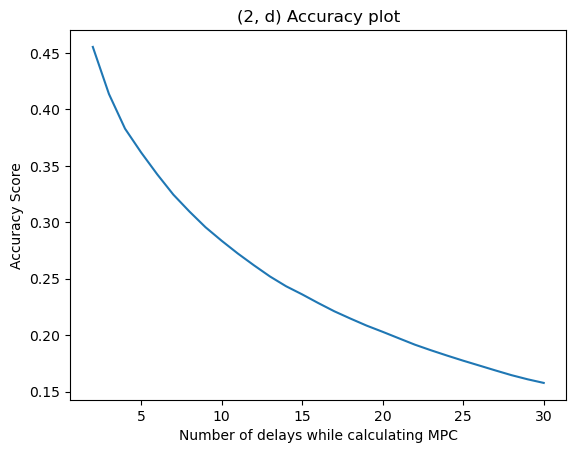

In [28]:
plot(2)

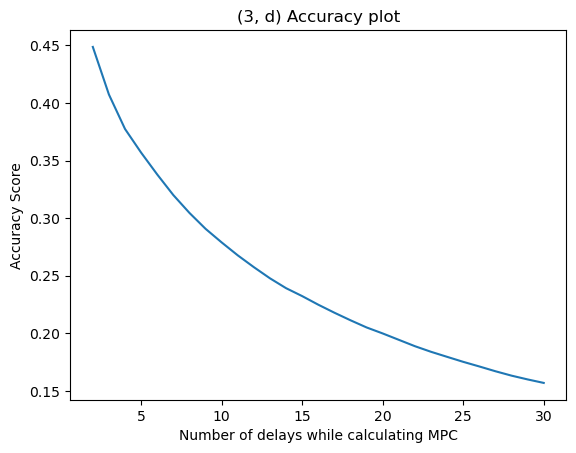

In [27]:
plot(3)

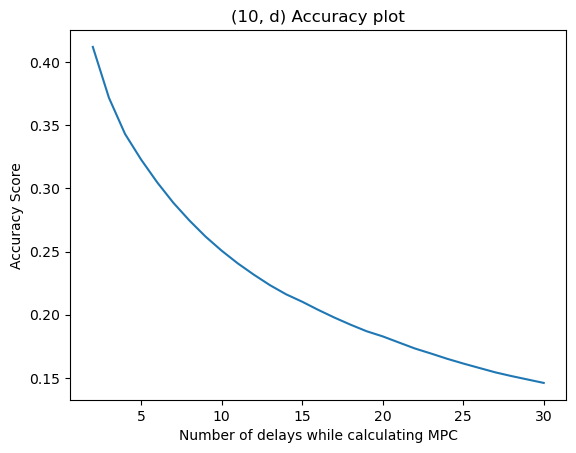

In [29]:
plot(10)

While keeping the number of lags constant we see that model accuracy decreases as the number of delays increase. And this effect is consistent at all lags.

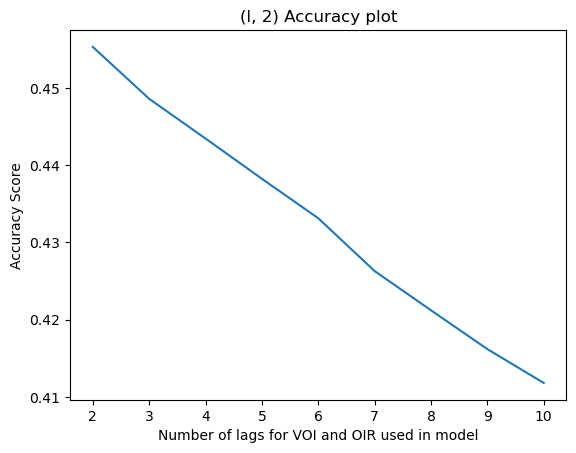

In [31]:
plott(2)

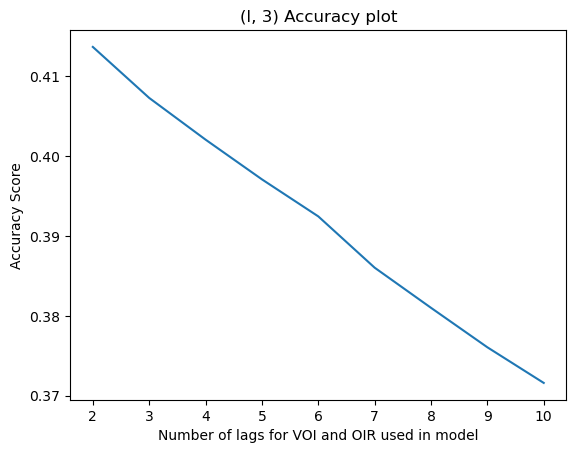

In [32]:
plott(3)

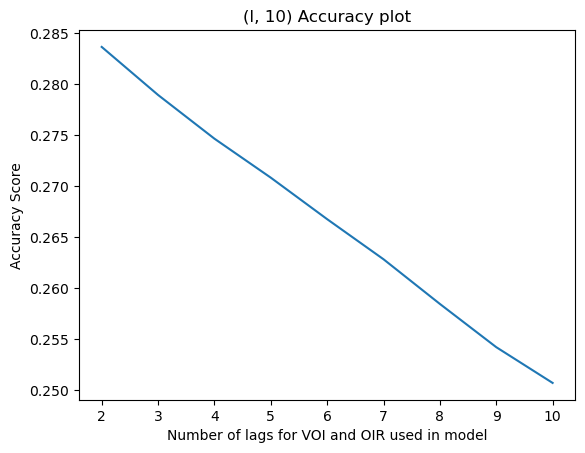

In [33]:
plott(10)

We see that accuracy decrease with an increase in the number of lags while keeping the delays constant. Therefore, the least lag and delay possible should be the most accurate.

### Optimising for threshold while trading on actual MPC

In [34]:
# Create an empty dictionary to store the results
results_dict = {}

l, d = 0, 2
data1 = linear_data(df1, df2, l=l, d=d)
data2 = linear_data(df3, df4, l=l, d=d)
data3 = linear_data(df5, df6, l=l, d=d)
data4 = linear_data(df7, df8, l=l, d=d)
data5 = linear_data(df9, df10, l=l, d=d)
data6 = linear_data(df11, df12, l=l, d=d)
data7 = linear_data(df13, df14, l=l, d=d)
data8 = linear_data(df15, df16, l=l, d=d)
data9 = linear_data(df17, df18, l=l, d=d)
data10 = linear_data(df19, df20, l=l, d=d)
data11 = linear_data(df21, df22, l=l, d=d)
data12 = linear_data(df23, df24, l=l, d=d)
data13 = linear_data(df25, df26, l=l, d=d)

frames = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13]

result = pd.concat(frames)
train, test = np.split(result, [int(0.8*len(result))])

validate_model(train, test, l=l, threshold=0.41, optimise=True)

0.4794442650100674

Model with $(l, d)$ = $(0, 2)$ is the most accurate. Now let's test for the optimal threshold.

#### Threshold between 0.1 and 0.99

Let's look at profits before costs

In [ ]:
results_dict = {}
for threshold in [x/100 for x in range(1,100)]:
    cost, tc, vol = backtest_strategy(train, test, threshold=threshold, l=0, to_test='Real', optimise=True)
    results_dict[threshold] = sum(cost)

In [36]:
max(zip(results_dict.values(), results_dict.keys()))

(39087.59999999867, 0.44)

In [37]:
results_dict.values()

dict_values([38052.69999999856, 38052.69999999856, 38165.999999999185, 38165.999999999185, 38262.59999999989, 38295.19999999899, 38295.19999999899, 38350.39999999921, 38350.39999999921, 38382.39999999938, 38420.199999999226, 38420.199999999226, 38491.59999999916, 38491.59999999916, 38528.999999999214, 38536.59999999916, 38536.59999999916, 38571.19999999917, 38571.19999999917, 38570.99999999924, 38643.999999999156, 38643.999999999156, 38700.59999999899, 38700.59999999899, 38799.999999998894, 38805.39999999892, 38805.39999999892, 38878.59999999887, 38878.59999999887, 38915.799999999086, 38911.99999999898, 38911.99999999898, 38970.79999999888, 38970.79999999888, 38955.39999999892, 38956.59999999884, 38956.59999999884, 38954.199999998964, 38954.199999998964, 38994.19999999908, 38982.999999998836, 38982.999999998836, 39087.59999999867, 39087.59999999867, 39086.19999999873, 39047.99999999881, 39047.99999999881, 39055.59999999884, 39055.59999999884, 39076.199999998935, 39064.19999999888, 3906

When trading on real MPC the optimal threshold is $0.44$ given data with $l=0$, and $d=2$.